<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/12_Decision_Tree_classification_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
df= pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = data.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X = df

In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [14]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy")

In [17]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'x[2] <= 2.6\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 

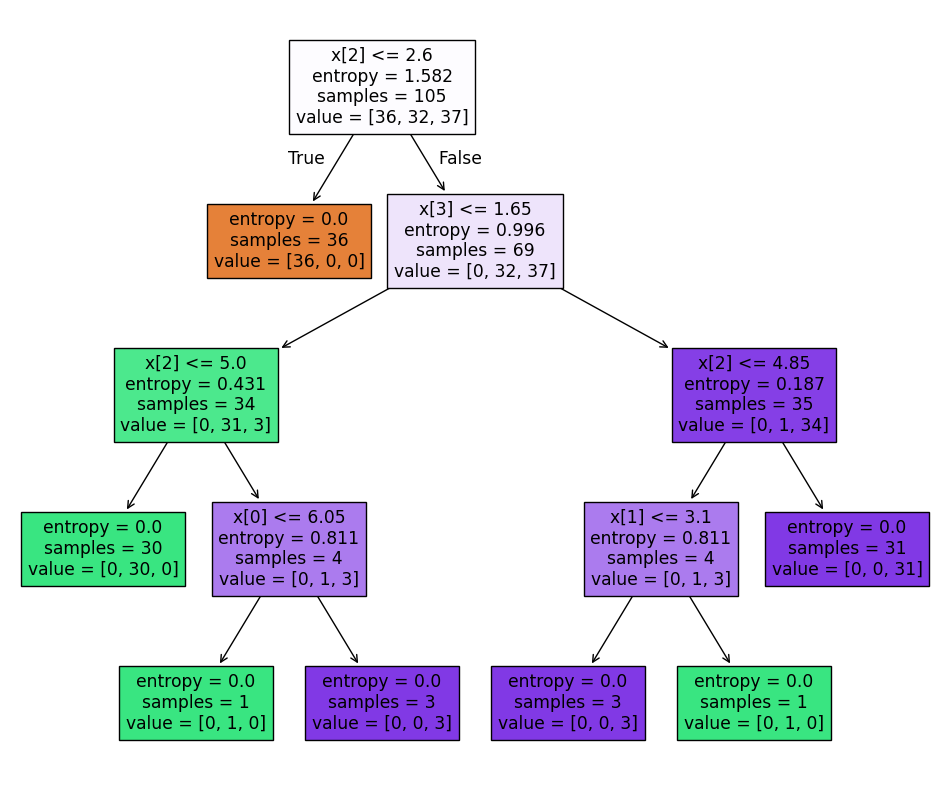

In [18]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled = True)

In [19]:
## pospruning
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=2)

In [20]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

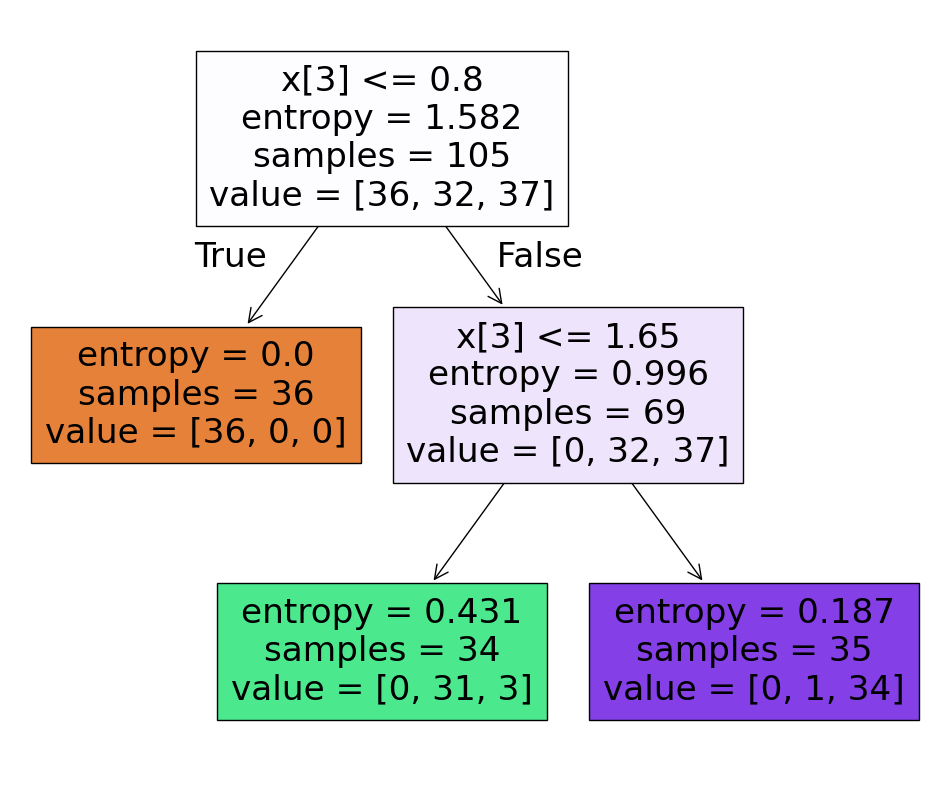

In [21]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled = True)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [24]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [25]:
#prepruning using hyperparameter tuning

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5, 6],
  'max_features':['sqrt', 'log2', 'auto']

}

In [26]:
from sklearn.model_selection import GridSearchCV


In [27]:
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid=parameter,cv = 5,scoring='accuracy')

In [28]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [29]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [30]:
model.best_score_

np.float64(0.9714285714285715)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.44      1.00      0.62         8
           2       1.00      0.57      0.72        23

    accuracy                           0.78        45
   macro avg       0.81      0.86      0.78        45
weighted avg       0.90      0.78      0.79        45

